In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./data/gm2offline_ana_merged.root")
#f = r.TFile("./data/gm2offline_ana_run16355.root")
#f = r.TFile("./gm2offline_ana_7893458_15937.00027.root")
#f.cd("clusterTree")
f.ls()

TFile**		./data/gm2offline_ana_merged.root	chain files
 TFile*		./data/gm2offline_ana_merged.root	chain files
  KEY: TTree	clusters;1	clusters


In [3]:
#t = f.Get("clusterTree").Get("clusters")
t = f.Get("clusters")

In [4]:
t.Print()

******************************************************************************
*Tree    :clusters  : clusters                                               *
*Entries : 101741458 : Total =      6918577711 bytes  File  Size = 2847103962 *
*        :          : Tree compression factor =   2.43                       *
******************************************************************************
*Br    0 :energy    : energy/D                                               *
*Entries :101741458 : Total  Size=  813950120 bytes  File Size  =  774777480 *
*Baskets :      187 : Basket Size=    5676215 bytes  Compression=   1.05     *
*............................................................................*
*Br    1 :time      : time/D                                                 *
*Entries :101741458 : Total  Size=  813949738 bytes  File Size  =  776764309 *
*Baskets :      187 : Basket Size=    5676215 bytes  Compression=   1.05     *
*..................................................

In [5]:
c = r.TCanvas()

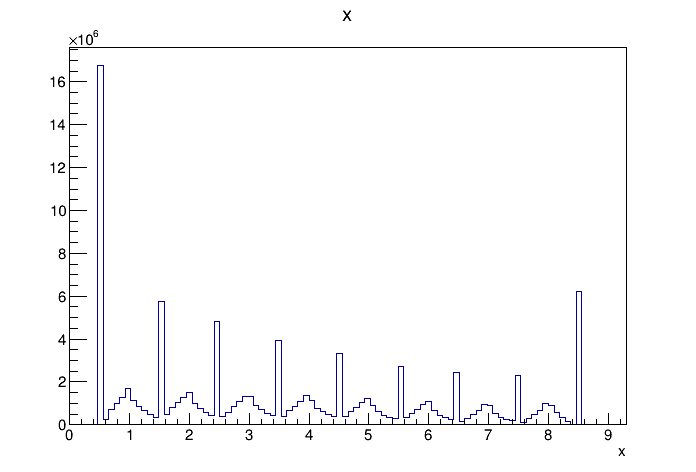

In [9]:
t.Draw("x")
c.Draw()

In [10]:
#t.Draw("x:y:energy", "energy>1660 && energy<6000 && time*1.25 > 30000 && caloNum==2", "colz")
#t.Draw("energy:x:y","energy>1660 && energy<6000 && time*1.25 > 30000 && caloNum==2","PROFCOLZ")
#c.Draw()

In [11]:
h2 = r.TH3D("h2","h2",6000,0,6000,600,0,6,450,0,9)
#h2 = r.TH2D()
t.Draw("x:y:energy>>h2", "energy>1660 && energy<6000 && time*1.25 > 30000 && caloNum==2", "goff")
h2 = r.gDirectory.Get("h2")

In [12]:
#h2.Draw()
#c.Draw()

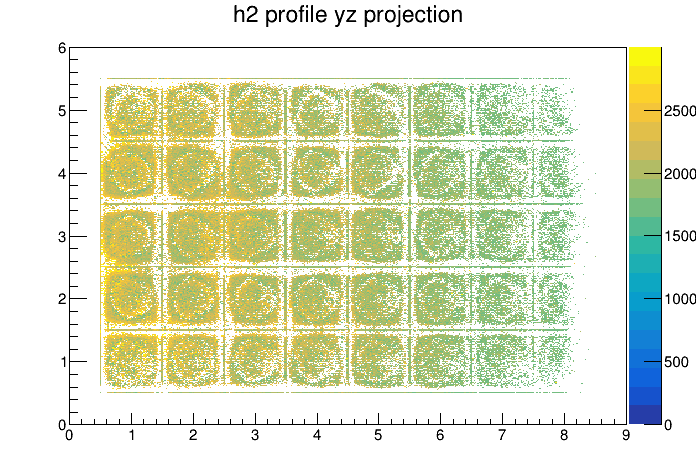

In [13]:
h2.GetXaxis().SetRangeUser(0,3000)
h2.Project3DProfile("yz").Draw("colz")
c.Draw()

In [ ]:
#h14 = r.TH2D()
h14 = r.TH3D("h14","h14",4340,1660,6000,600,0,6,450,0,9)
t.Draw("x:y:energy>>h14", "energy>1660 && energy<6000 && time*1.25 > 30000 && caloNum==14", "goff")
h14 = r.gDirectory.Get("h14")

In [ ]:
h14.GetXaxis().SetRangeUser(0,3000)
h14.Project3DProfile("yz").Draw("colz")
c.Draw()

In [ ]:
h8 = r.TH3D("h8","h8",4340,1660,6000,600,0,6,450,0,9)
t.Draw("x:y:energy>>h8", "energy>1660 && energy<6000 && time*1.25 > 30000 && caloNum==8", "goff")
h8 = r.gDirectory.Get("h8")

In [ ]:
h8.GetXaxis().SetRangeUser(0,3000)
h8.Project3DProfile("yz").Draw("colz")
c.Draw()

In [ ]:
h20 = r.TH3D("h20","h20",4340,1660,6000,600,0,6,450,0,9)
#h14 = r.TH2D("h14","h14",60,0,6,45,0,9)
t.Draw("x:y:energy>>h20", "energy>1660 && energy<6000 && time*1.25 > 30000 && caloNum==20", "goff")
h20 = r.gDirectory.Get("h20")

In [ ]:
h20.GetXaxis().SetRangeUser(0,3000)
h20.Project3DProfile("yz").Draw("colz")
c.Draw()

In [ ]:
hdiff = h14.Project3DProfile("zy").Clone()#.Rebin2D(10)
hdiff.SetTitle("Calo 14 - Calo 2")
hdiff.Add(h2.Project3DProfile("zy").Clone(),-1)#.Rebin2D(10),-1)
hdiff.Draw("COLZ")
c.Draw()

In [ ]:
projectionVec = []
for i in range(24):
    calonum = i+1
    calostring = "h"+str(i+1)
    hi = r.TH3D(calostring,calostring,4340,1660,6000,30,0,6,45,0,9)
    projectionVec.append(hi.Clone(calostring))
    print(i)
print(projectionVec)

In [8]:
c = r.TCanvas()

In [5]:
projectionVec = []

for i in range(24):
    print("Starting Calo", i+1)
    calostring = "h"+str(i+1)
    
    hi = r.TH3D("hi","hi",4340,1660,6000,120,0,6,180,0,9)
    t.Draw("x:y:energy>>hi", "time*1.25 > 30000 && time*1.25 < 650000 && caloNum=="+str(i+1), "goff")
#    t.Draw("x:y:energy>>hi", "energy>2000 && energy<6000 && time*1.25 > 30000 && time*1.25 < 650000 && caloNum=="+str(i+1), "goff")
    hi = r.gDirectory.Get("hi")
    hi.SetTitle(calostring)
    print("    Histogram generated")
    
    hi.GetXaxis().SetRangeUser(0,3000)
#    hi.Project3DProfile("yz").Draw("colz")
    
    projectionVec.append(hi.Clone(calostring))
    
    c.Draw()

Starting Calo 1
    Histogram generated


NameError: name 'c' is not defined

In [ ]:
print(projectionVec)
meanVecX = []
c = r.TCanvas("c","c",1000,600)

for i in range(len(projectionVec)):
#    ding = projectionVec[i].Project3DProfile("yz")
    ding = projectionVec[i].Project3D("yz")
#    ding.Rebin2D(2)
    ding.GetZaxis().SetRangeUser(0,500)
    ding.SetTitle("Calorimeter "+str(i+1)+" Energy Distribution")
    ding.GetXaxis().SetTitle("x position")
    ding.GetYaxis().SetTitle("y position")
    ding.GetZaxis().SetTitle("Energy (MeV)")
    ding.GetZaxis().SetNdivisions(555)
    c.SetLogz()
    c.SetRightMargin(0.18)
    ding.Draw("COLZ")
    c.Draw()
    c.Print("./energyInCalos/"+str(int(i+1)).zfill(3)+"_count_noEnergyCut.png" )
    meanVecX.append((i+1,ding.GetMean(), ding.GetRMS()))

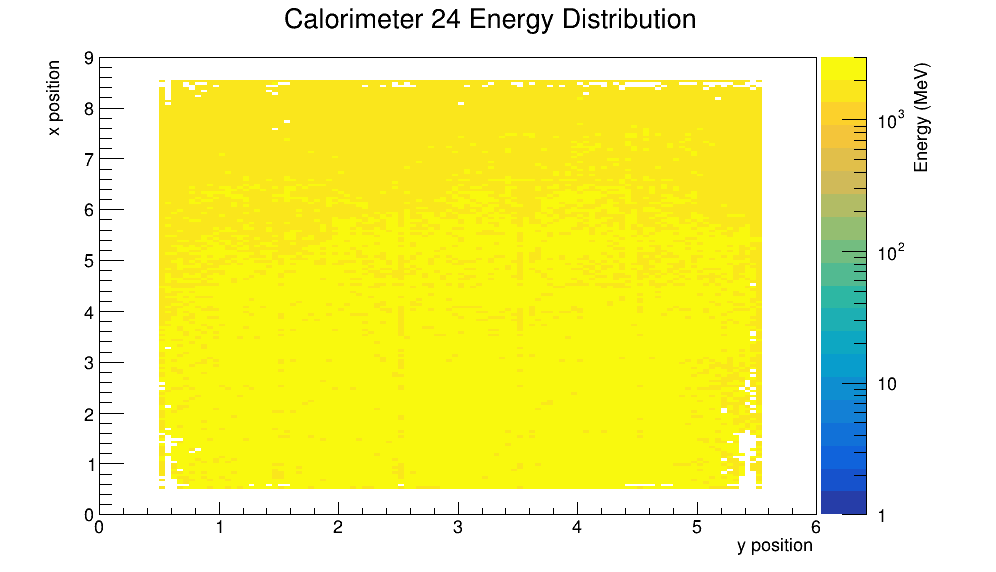

In [8]:
meanVecY = []

for i in range(len(projectionVec)):
    ding = projectionVec[i].Project3DProfile("zy")
    ding.GetZaxis().SetRangeUser(0,3000)
    ding.SetTitle("Calorimeter "+str(i+1)+" Energy Distribution")
    ding.GetXaxis().SetTitle("y position")
    ding.GetYaxis().SetTitle("x position")
    ding.GetZaxis().SetTitle("Energy (MeV)")
    ding.Draw("COLZ")
    c.Draw()
    meanVecY.append((i+1,ding.GetMean(), ding.GetRMS()))

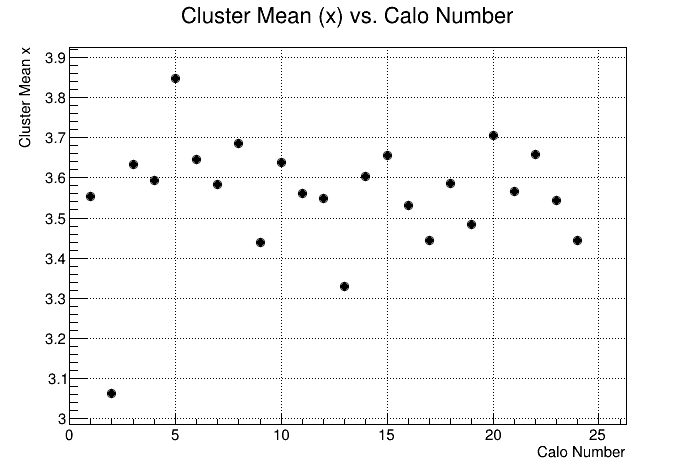

In [9]:
gr = r.TGraph()
for i, (calonum, mean, stdev) in enumerate(meanVecX):
    gr.SetPoint(i,calonum,mean)

c = r.TCanvas()

gr.SetMarkerStyle(20)
gr.SetMarkerSize(1)
gr.SetTitle("Cluster Mean (x) vs. Calo Number")
gr.GetXaxis().SetTitle("Calo Number")
gr.GetYaxis().SetTitle("Cluster Mean x")
gr.Draw("ap")

c.SetGridx()
c.SetGridy()
c.Draw()

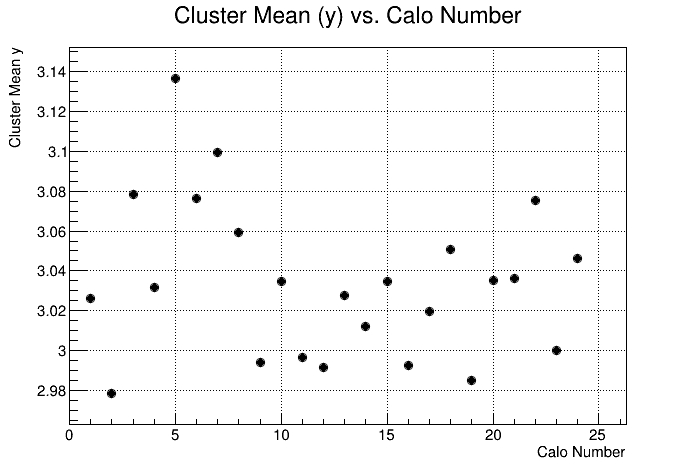

In [10]:
gry = r.TGraph()
for i, (calonum, mean, stdev) in enumerate(meanVecY):
    gry.SetPoint(i,calonum,mean)

c = r.TCanvas()

gry.SetMarkerStyle(20)
gry.SetMarkerSize(1)
gry.SetTitle("Cluster Mean (y) vs. Calo Number")
gry.GetXaxis().SetTitle("Calo Number")
gry.GetYaxis().SetTitle("Cluster Mean y")
gry.Draw("ap")

c.SetGridx()
c.SetGridy()
c.Draw()

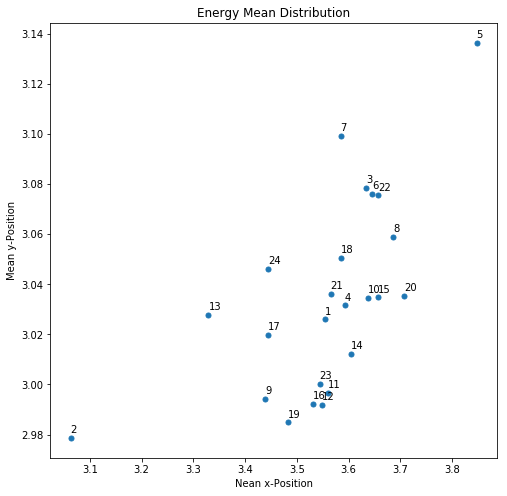

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
CaloNum, MeanX, StdX = zip(*meanVecX)
CaloNum2, MeanY, StdY = zip(*meanVecY)
plt.xlabel('Nean x-Position')
plt.ylabel('Mean y-Position')
plt.title('Energy Mean Distribution')
plt.errorbar(x = MeanX, y = MeanY, yerr = 0, xerr = 0, ls='none',markersize=5,fmt='o')
for i,(ci,MeanX,StdX) in enumerate(meanVecX):
    ax.annotate(ci, xy=(MeanX,MeanY[i]), xytext=(0,5), textcoords='offset points')

In [12]:
print(ding.GetNbinsX(),ding.GetNbinsX())
entriesVec = []
contentVec = []
for i in range(120):
    for j in range(120):
        binnum = ding.GetBin(i,j)
        if (ding.GetBinEntries(binnum) > 0):
            entriesVec.append(ding.GetBinEntries(binnum))
            contentVec.append(ding.GetBinContent(binnum))
print(ding.GetBin(50,50))
print(ding.GetBinContent(6150))
print(ding.GetBinEntries(6150))

120 120
6150
2129.1666666666665
9.0


In [13]:
print(sum(entriesVec)/float(len(entriesVec)))
meanEnergy = sum(contentVec)/float(len(contentVec))
print(meanEnergy)

37.5164198325821
2101.7064342073804


[<ROOT.TH3D object ("h1") at 0x7fffc8ad99a0>, <ROOT.TH3D object ("h2") at 0x7fffc88fff20>, <ROOT.TH3D object ("h3") at 0x7fffc8aed570>, <ROOT.TH3D object ("h4") at 0x7f40a4592b60>, <ROOT.TH3D object ("h5") at 0x7fffc8ae7c10>, <ROOT.TH3D object ("h6") at 0x7fffc8ae22d0>, <ROOT.TH3D object ("h7") at 0x7fffc8b02d20>, <ROOT.TH3D object ("h8") at 0x7fffc8b011d0>, <ROOT.TH3D object ("h9") at 0x7fffc8a4ceb0>, <ROOT.TH3D object ("h10") at 0x7fffc8ae7610>, <ROOT.TH3D object ("h11") at 0x7fffc8aeb2d0>, <ROOT.TH3D object ("h12") at 0x7fffc8ae4980>, <ROOT.TH3D object ("h13") at 0x7fffc8aede20>, <ROOT.TH3D object ("h14") at 0x7fffc8aed9f0>, <ROOT.TH3D object ("h15") at 0x7fffc8adc3f0>, <ROOT.TH3D object ("h16") at 0x7fffc8adbfc0>, <ROOT.TH3D object ("h17") at 0x7fffc8b04b90>, <ROOT.TH3D object ("h18") at 0x7fffc8b04760>, <ROOT.TH3D object ("h19") at 0x7fffc8aef7b0>, <ROOT.TH3D object ("h20") at 0x7f40a4591330>, <ROOT.TH3D object ("h21") at 0x7fffc8a21a40>, <ROOT.TH3D object ("h22") at 0x7fffc8a2161

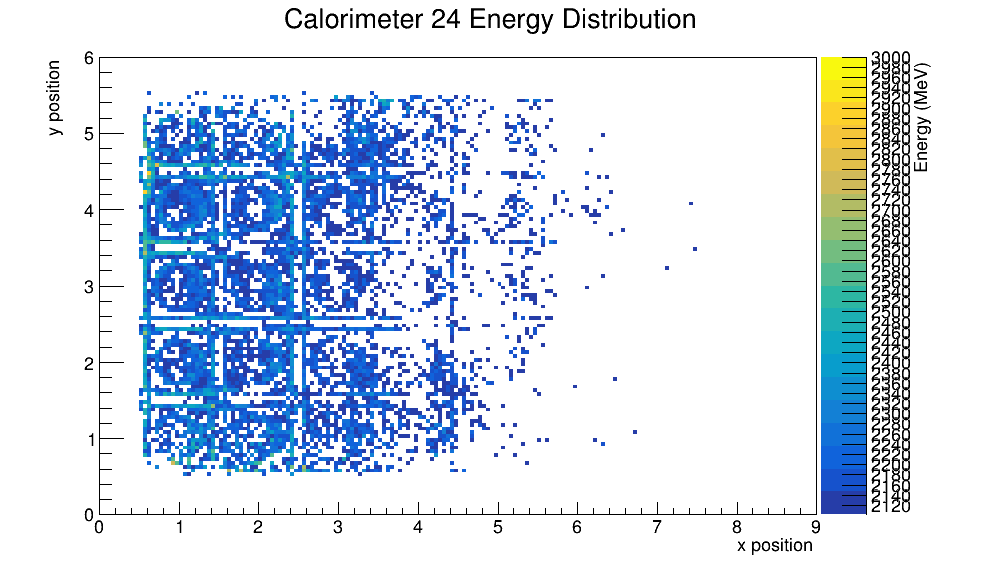

In [14]:
print(projectionVec)
meanVecX = []
c = r.TCanvas("c","c",1000,600)

for i in range(len(projectionVec)):
    ding = projectionVec[i].Project3DProfile("yz")
#    ding.Rebin2D(2)
    ding.GetZaxis().SetRangeUser(meanEnergy,3000)
    ding.SetTitle("Calorimeter "+str(i+1)+" Energy Distribution")
    ding.GetXaxis().SetTitle("x position")
    ding.GetYaxis().SetTitle("y position")
    ding.GetZaxis().SetTitle("Energy (MeV)")
    ding.GetZaxis().SetNdivisions(555)
#    c.SetLogz()
    c.SetRightMargin(0.18)
    ding.Draw("COLZ")
    c.Draw()
#    c.Print("./energyInCalos/"+str(int(i+1)).zfill(3)+"_nolog.png" )
    meanVecX.append((i+1,ding.GetMean(), ding.GetRMS()))

In [15]:
print(ding.GetBin(50,50))
print(ding.GetBinContent(9150))
print(ding.GetBinEntries(9150))

9150
2129.1666666666665
9.0


[<ROOT.TH3D object ("h1") at 0x7fffc5b88110>]


Info in <TCanvas::Print>: png file ./energyInCalos/001_count_noEnergyCut.png has been created


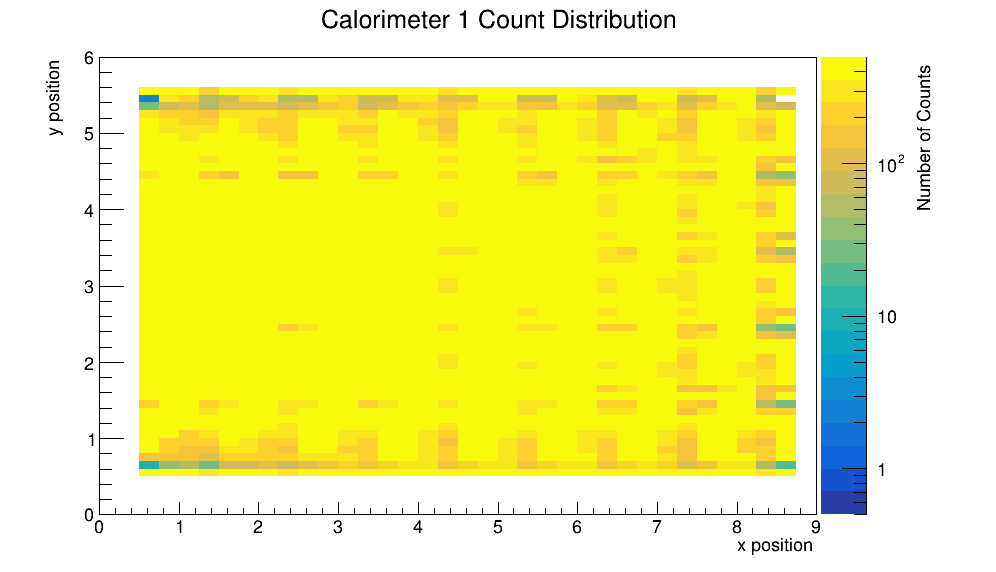

In [7]:
print(projectionVec)
meanVecXCount = []
c = r.TCanvas("c","c",1000,600)

for i in range(len(projectionVec)):
#    ding = projectionVec[i].Project3DProfile("yz")
    ding = projectionVec[i].Project3D("yz")
    ding.Rebin2D(5)
    ding.GetZaxis().SetRangeUser(0,500)
    ding.SetTitle("Calorimeter "+str(i+1)+" Count Distribution")
    ding.GetXaxis().SetTitle("x position")
    ding.GetYaxis().SetTitle("y position")
    ding.GetZaxis().SetTitle("Number of Counts")
    ding.GetZaxis().SetNdivisions(555)
    c.SetLogz()
    c.SetRightMargin(0.18)
    ding.Draw("COLZ")
    c.Draw()
    c.Print("./energyInCalos/"+str(int(i+1)).zfill(3)+"_count_noEnergyCut.png" )
    meanVecXCount.append((i+1,ding.GetMean(), ding.GetRMS()))

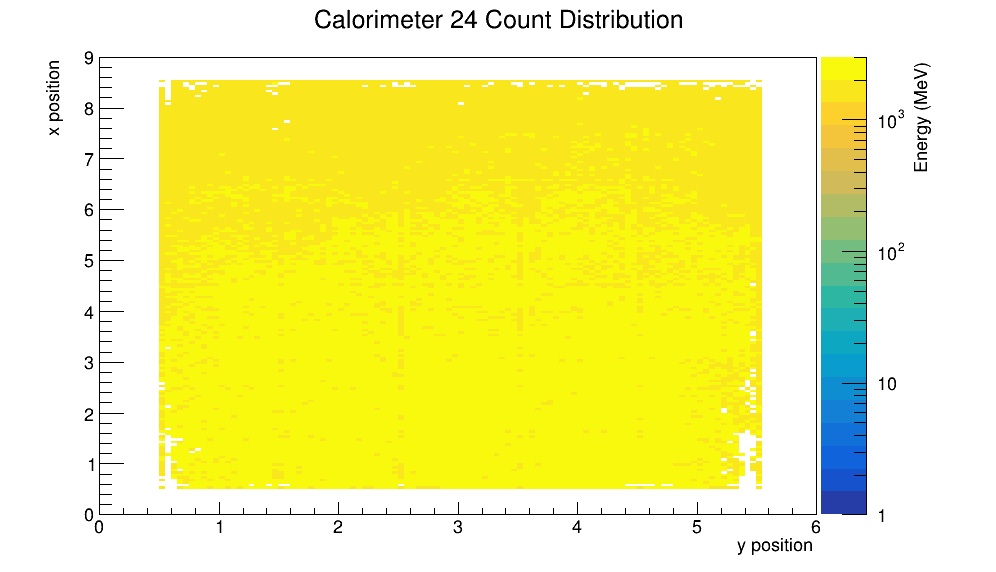

In [17]:
meanVecYCount = []

for i in range(len(projectionVec)):
    ding = projectionVec[i].Project3DProfile("zy")
    ding.GetZaxis().SetRangeUser(0,3000)
    ding.SetTitle("Calorimeter "+str(i+1)+" Count Distribution")
    ding.GetXaxis().SetTitle("y position")
    ding.GetYaxis().SetTitle("x position")
    ding.GetZaxis().SetTitle("Energy (MeV)")
    ding.Draw("COLZ")
    c.Draw()
    meanVecYCount.append((i+1,ding.GetMean(), ding.GetRMS()))

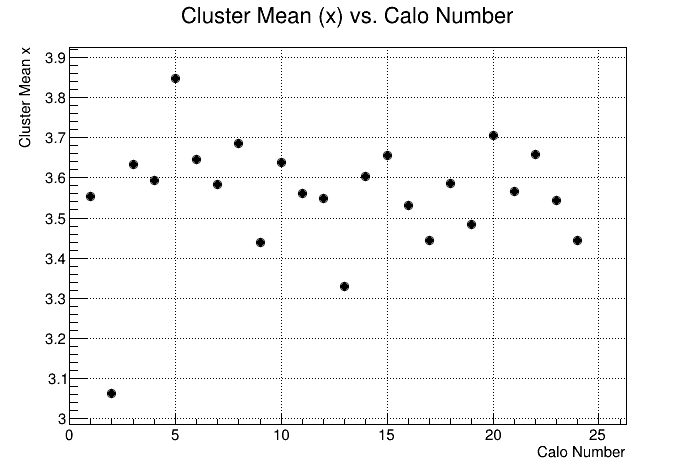

In [18]:
gr = r.TGraph()
for i, (calonum, mean, stdev) in enumerate(meanVecXCount):
    gr.SetPoint(i,calonum,mean)

c = r.TCanvas()

gr.SetMarkerStyle(20)
gr.SetMarkerSize(1)
gr.SetTitle("Cluster Mean (x) vs. Calo Number")
gr.GetXaxis().SetTitle("Calo Number")
gr.GetYaxis().SetTitle("Cluster Mean x")
gr.Draw("ap")

c.SetGridx()
c.SetGridy()
c.Draw()

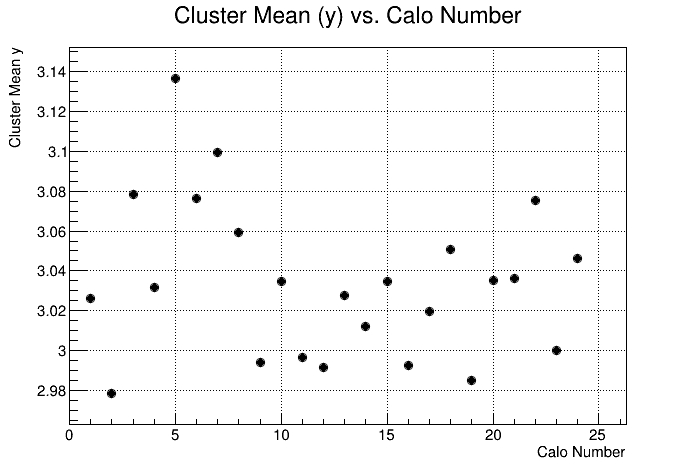

In [19]:
gry = r.TGraph()
for i, (calonum, mean, stdev) in enumerate(meanVecYCount):
    gry.SetPoint(i,calonum,mean)

c = r.TCanvas()

gry.SetMarkerStyle(20)
gry.SetMarkerSize(1)
gry.SetTitle("Cluster Mean (y) vs. Calo Number")
gry.GetXaxis().SetTitle("Calo Number")
gry.GetYaxis().SetTitle("Cluster Mean y")
gry.Draw("ap")

c.SetGridx()
c.SetGridy()
c.Draw()

In [35]:
print(meanVecXCount)
print(meanVecYCount)

[(1, 3.554799939551115, 2.242480236611064), (2, 3.063177319264415, 2.0059212292061117), (3, 3.633194265285027, 2.2354029489702745), (4, 3.5926622496161014, 2.241421844974952), (5, 3.8471855528944836, 2.2197423835936236), (6, 3.646019317410899, 2.2601485439804714), (7, 3.584642866760149, 2.2414432544296186), (8, 3.686311327431381, 2.259015997154165), (9, 3.439020477815719, 2.196564004181609), (10, 3.637898172109619, 2.245639642542969), (11, 3.5603008764020743, 2.27594814242105), (12, 3.548356141117092, 2.2033317999869224), (13, 3.3292375470038413, 2.2154789355369444), (14, 3.6042549957361327, 2.243861074831134), (15, 3.656350757760294, 2.2565767374185235), (16, 3.5314386518490353, 2.1959517667179096), (17, 3.4437957808379873, 2.243189623667513), (18, 3.5851904041607816, 2.244635016980491), (19, 3.483047855468214, 2.2496058778430377), (20, 3.7066514796102425, 2.260313586124462), (21, 3.5650591840346904, 2.2546447247620254), (22, 3.657404360972532, 2.250273518824725), (23, 3.5440262673984

In [36]:
'''import csv

out = open('./data/meanVecXCount.csv','w')
csv_out = csv.writer(out)
csv_out.writerow(['Calorimeter Number','Mean','StDev'])
for item in meanVecXCount:
    csv_out.writerow(item)
out.close()'''
'''import csv

out = open('./data/meanVecYCount.csv','w')
csv_out = csv.writer(out)
csv_out.writerow(['Calorimeter Number','Mean','StDev'])
for item in meanVecYCount:
    csv_out.writerow(item)
out.close()'''

In [ ]:
fout = r.TFile("./data/Calo2Projections_New_NoEnergyCut.root","RECREATE")
fout.cd()
fout.ls()
for i, hist in enumerate(projectionVec):
    print(hist)
    histstring = "h"+str(i+1)
    print(histstring)
    hist.Write(histstring)
fout.Write()
fout.Close()